# Making Topic Usage Graph
This python library creates a bar graph of clusters and cluster favorance values for analysis across multiple subreddits. It also can graph specific clusters with topic names and create a matrix of top words sorted by frequency for all clusters for analysis.

In [1]:
# Import useful mathematical libraries
import copy
import numpy as np
import pandas as pd

# Import useful Machine learning libraries
import gensim

#Import nltk list of stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

#Import Graph Functions
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes
import matplotlib.gridspec as gridspec
import plotly.plotly as py
import plotly.tools as tls

#import function for normalization
from sklearn.preprocessing import normalize

#import TF function
from sklearn.feature_extraction.text import CountVectorizer


# Import utility files
from utils import read_df, remove_links, clean_sentence, save_object, load_object, generate_cluster_favorance, make_clustering_objects,make_frequency_dictionary

from pprint import pprint

[nltk_data] Downloading package stopwords to /Users/Alex/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#Enter Model Name from BuildModelsAndMatricies
model_name = 'DrugAbuse'
#Enter Subreddit Abbreviation List from BuildModelsAndMatricies
subredditAbr = ['Marijuana','Cigarettes','Alcohol','Opiates','Cocaine']
#Enter Subreddit Real Names
subreddits = ['leaves','stopsmoking','stopdrinking','OpiatesRecovery','StopSpeeding']
sumNormMatrix = generate_cluster_favorance(model_name,subredditAbr)      

In [15]:
#The names for the legend for the usage graph
legendNames = ['Marijuana','Cigarettes','Alcohol','Opiates','Stimulants']
#Enter colors for your corresponding subreddits, these can be RGB values or just color names based off matplotlib color key words.
colors = [(0.133, 0.584, 0.882),(0.631, 0.133, 0.882),(0.745, 0.066, 0.035),(0.901, 0.635, 0.101),(0.133, 0.882, 0.607)]

#Graph The Results

#initializing variables
w = 0.8/len(subredditAbr)
index = 0
x_Shift = -2.5*w
x = np.linspace(1,100,100)
#bax = brokenaxes(ylims=((0,0.05), (0.5, 0.6)), hspace=.05)
#fig,(ax1,ax2) = plt.subplots(2,1,sharex=True,figsize=(200,50))
ylimratio = (0.15)
ylim2ratio = (0.85)
gs = gridspec.GridSpec(2, 1, height_ratios=[ylimratio, ylim2ratio])
fig = plt.figure(figsize=(200,100))
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
plt.subplots_adjust(hspace=0.04)

#making bar graphs
for matrix in sumNormMatrix:
    ax1.bar(x+x_Shift, matrix.ravel(), width=w, color=colors[index], align='center',label=legendNames[index])
    ax2.bar(x+x_Shift, matrix.ravel(), width=w, color=colors[index], align='center',label=legendNames[index])
    x_Shift=x_Shift+w
    index=index+1
    
    
#Adjust Labels and Sizes   
ax2.set_ylabel('% Cluster',fontsize=175)
ax2.yaxis.set_label_coords(0.10, 0.5, transform=fig.transFigure)
#ax2.legend(loc='upper right',prop={'size':100})
plt.legend(bbox_to_anchor=(0.89,0.86),\
    bbox_transform=plt.gcf().transFigure,prop={'size':125})
plt.xticks(x)
ax1.tick_params(axis='both', which='major', labelsize=100)
ax2.tick_params(axis='both', which='major', labelsize=100)


#Breaking the y-axis
ax1.spines['bottom'].set_visible(False)
ax1.tick_params(axis='x',which='both',bottom=False)
ax2.spines['top'].set_visible(False)
ax2.set_ylim(0,0.045)
ax1.set_ylim(0.5,0.6)
ax1.set_yticks(np.arange(0.5,0.61,0.05))
ax1.set_xlim([0.5,101])
ax2.set_xlim([0.5,101])
ax1.tick_params(labeltop=False)
ax1.tick_params(labelbottom=False)
plt.xticks(rotation='vertical')


#Make Break Lines
kwargs = dict(color='k', clip_on=False)
xlim = ax1.get_xlim()
ylim = ax1.get_ylim()
ylim2 = ax2.get_ylim()
dx = .02*(xlim[1]-xlim[0])
dy = .01*(.1/.15)
ax1.plot((xlim[0]-0.5*dx,xlim[0]+0.5*dx), (ylim[0]-0.5*dy,ylim[0]+0.5*dy), **kwargs)
ax1.plot((xlim[1]-0.5*dx,xlim[1]+0.5*dx), (ylim[0]-0.5*dy,ylim[0]+0.5*dy), **kwargs)
dy = .01*(.045)/.85
ax2.plot((xlim[0]-0.5*dx,xlim[0]+0.5*dx), (ylim2[1]-0.5*dy,ylim2[1]+0.5*dy), **kwargs)
ax2.plot((xlim[1]-0.5*dx,xlim[1]+0.5*dx), (ylim2[1]-0.5*dy,ylim2[1]+0.5*dy), **kwargs)

plt.show()

## Interesting Topics Graph
The following code gives a horizontal bar graph of cluster distributions for clusters that may be deemed important through analysis of the cluster topic and usage differentials.


In [8]:
#Enter the cluster numbers and topic names for each important cluster. 
#Make sure the orger for both arrays matches up. 
clustersOriginalIndex = [68,29,34,7,77,81,97,48,54,62]
topicNames = ['Dreams and Memories', 'Mental distress', 'Cigarette Use', 'Time Focused Encouragement', 'Alcohol Use', 'Social Events', 'Opiate Use', 'Clinical Avenues of Recovery', 'Pill Form Medications', 'Positive Recovery Words']

#Gets usage data for the clusters to graph.
clustersNP = np.asarray(clustersOriginalIndex)
clustersIndex = np.subtract(clustersNP,1)
coolClusters = []
for matrix in sumNormMatrix:
    clusterData = []
    for index in clustersIndex:
        clusterData.append(matrix[0][index])
    coolClusters.append(clusterData)

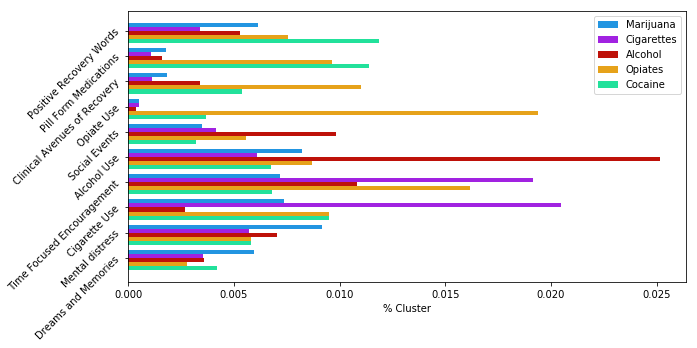

In [14]:
#Setting up variables for graphing
x1 = np.arange(len(topicNames))
colors = [(0.133, 0.584, 0.882),(0.631, 0.133, 0.882),(0.745, 0.066, 0.035),(0.901, 0.635, 0.101),(0.133, 0.882, 0.607)]
index = 0
w = 0.8/5
index = 0
x_Shift = -2.5*w
fig2 = plt.figure(figsize=(10,5))
fig2.patch.set_facecolor('xkcd:white')
ax = fig2.add_subplot(111)

#Making horizontal bar graphs
for i in range(len(coolClusters)):
    ax.barh(x1+x_Shift, coolClusters[4-index], height=w, color=colors[4-index], align='center',label=subredditAbr[4-index])
    x_Shift=x_Shift+w
    index=index+1

ax.set_yticks(x1)
handles,labels = ax.get_legend_handles_labels()
handles = [handles[4], handles[3],handles[2], handles[1],handles[0]]
labels = [labels[4], labels[3],labels[2], labels[1],labels[0]]
ax.legend(handles,labels)
ax.set_yticklabels(topicNames)
plt.xlabel('% Cluster')
plt.yticks(rotation=45)
plt.show()


# Make CSV of Top Words
The following code makes a sorted list of clusters and their top words by frequency.
In the utils function you will also find a function that can print out the top n words from k cluser in a nice printed format, or even make a csv for you as well. Useful for presentations and writing the paper.

In [16]:
num_clusters = 100
model = gensim.models.Word2Vec.load('models/' + model_name + '.model')
kmeans = load_object('clusters/', model_name + "-words-cluster_model-" + str(num_clusters))
WordsByFeatures = load_object('matricies/', model_name + '-' + 'WordsByFeatures')
vocab_list = sorted(list(model.wv.vocab))

/Users/Alex/anaconda3/lib/python3.6/site-packages/smart_open/smart_open_lib.py:398: UserWarning:

This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function



In [17]:
clusters = make_clustering_objects(model, kmeans, vocab_list, WordsByFeatures)

In [18]:
#Sort by word frequency
clustersSorted = []
for i in range(len(clusters)):
    listUnsorted = clusters[i]['word_list']
    vocab_sorted = sorted(listUnsorted, key=lambda x: -x[1])
    clustersSorted.append(vocab_sorted)
    


In [19]:
clustersSorted[5]

[('watching', 5572),
 ('watch', 4918),
 ('music', 4909),
 ('play', 4191),
 ('playing', 3028),
 ('movie', 2874),
 ('shows', 2045),
 ('tv', 1824),
 ('games', 1786),
 ('cooking', 1602),
 ('movies', 1488),
 ('hobby', 1368),
 ('art', 1161),
 ('keep_busy', 1158),
 ('video_games', 1141),
 ('homework', 999),
 ('catching', 921),
 ('netflix', 888),
 ('chores', 872),
 ('watching_tv', 861),
 ('playing_video_games', 772),
 ('play_video_games', 747),
 ('draw', 718),
 ('gaming', 715),
 ('watch_tv', 684),
 ('zone', 658),
 ('laptop', 628),
 ('listening_music', 600),
 ('chilling', 554),
 ('drawing', 539),
 ('guitar', 516),
 ('distracting', 454),
 ('painting', 449),
 ('read_books', 440),
 ('watch_movie', 435),
 ('chore', 426),
 ('listen_music', 405),
 ('keep_occupied', 379),
 ('watching_movie', 349),
 ('sitting_couch', 345),
 ('entertainment', 343),
 ('video_game', 340),
 ('play_games', 310),
 ('playing_games', 308),
 ('watching_netflix', 308),
 ('occupy', 294),
 ('steam', 293),
 ('watching_movies', 292)

In [20]:
#Set the number of words to include in the CSV.
size_words_list = 20
table = []
for i in range(len(clusters)):
    row = []
    row.append("cluster " + str(i+1))
    row.append(clusters[i]["total_freq"])
    row.append(clusters[i]["unique_words"])
    word_str = ""
    for j in range(size_words_list):
        try:
            row.append(clustersSorted[i][j])
            word_str += " " + str(clustersSorted[i][j])
        except:
            break
    row.append(word_str)
    table.append(row)

In [21]:
#Make Headers and Write Rows to CSV File
import csv
with open('cluster-analysis/' + model_name + "-" + str(num_clusters) + '.csv', 'w') as csvfile:
    labels = ["Cluster Num", "total_freq", "unique_words"]
    for i in range(size_words_list):
        labels.append("Word" + str(i+1))
    labels.append("word_list")
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    [writer.writerow(r) for r in table]

In [22]:
filepath = 'cluster-analysis/' + model_name + "-" + str(num_clusters) + '.csv'
df = pd.read_csv(filepath)
df.head(1500)

,Cluster Num,total_freq,unique_words,Word1,Word2,Word3,Word4,Word5,Word6,Word7,...,Word12,Word13,Word14,Word15,Word16,Word17,Word18,Word19,Word20,word_list
0,cluster 1,618,28,"('r_stopdrinking_report_sunday', 50)","('totals_days_posts_comments', 42)","('comments_table_top', 37)","('different_authors_see', 37)","('pm_et', 32)","('starting_pm_eastern', 30)","('edt', 25)",...,"('movies_leave_comment', 21)","('links_streams_provided_chat', 20)","('titlelink', 20)","('together_synced_closely_chat', 20)","('movie_night_lineup', 18)","('stopdrinkingmeeting_go', 18)","('type_join_stopdrinkingmeeting', 18)","('normal_webchat_type', 17)","('go_normal_webchat', 16)","('r_stopdrinking_report_sunday', 50) ('totals..."
1,cluster 2,101,3,"('evidenced', 39)","('yielded', 34)","('emotional_spiritual', 28)","('evidenced', 39) ('yielded', 34) ('emotional...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,cluster 3,196448,638,"('sleep', 35707)","('bed', 19320)","('wake', 17208)","('woke', 14961)","('hungover', 9048)","('hangover', 8399)","('waking', 8005)",...,"('mornings', 2903)","('awake', 2321)","('went_bed', 2191)","('shower', 2042)","('couch', 2041)","('woke_morning', 1832)","('like_crap', 1711)","('lay', 1517)","('hrs', 1472)","('sleep', 35707) ('bed', 19320) ('wake', 1720..."
3,cluster 4,81732,340,"('aa', 19730)","('meetings', 11383)","('program', 6697)","('sponsor', 6390)","('aa_meetings', 2741)","('smart', 2290)","('attend', 1841)",...,"('sessions', 864)","('meeting_tonight', 752)","('programs', 720)","('fellowship', 680)","('irl', 574)","('network', 570)","('hesitant', 528)","('smart_recovery', 495)","('working_steps', 461)","('aa', 19730) ('meetings', 11383) ('program',..."
4,cluster 5,229196,750,"('mind', 31787)","('head', 20247)","('brain', 17937)","('telling', 10295)","('fight', 8308)","('wants', 6763)","('addict', 6166)",...,"('beat', 4498)","('fighting', 3992)","('keeps', 3805)","('voice', 3103)","('battle', 3022)","('tells', 2562)","('pull', 2522)","('becomes', 2424)","('shut', 2116)","('mind', 31787) ('head', 20247) ('brain', 179..."
5,cluster 6,85855,728,"('watching', 5572)","('watch', 4918)","('music', 4909)","('play', 4191)","('playing', 3028)","('movie', 2874)","('shows', 2045)",...,"('hobby', 1368)","('art', 1161)","('keep_busy', 1158)","('video_games', 1141)","('homework', 999)","('catching', 921)","('netflix', 888)","('chores', 872)","('watching_tv', 861)","('watching', 5572) ('watch', 4918) ('music', ..."
6,cluster 7,210894,743,"('th', 8401)","('four', 7710)","('monday', 7700)","('date', 6847)","('number', 6726)","('smoke_free', 6381)","('badge', 5744)",...,"('celebrate', 4441)","('third', 4228)","('cant_believe', 4200)","('longest', 3904)","('count', 3691)","('tuesday', 3257)","('six', 3234)","('longest_ive', 3230)","('january', 3061)","('th', 8401) ('four', 7710) ('monday', 7700) ..."
7,cluster 8,48808,574,"('jail', 2828)","('dui', 2259)","('blew', 1349)","('prison', 1347)","('accident', 1153)","('probation', 1123)","('police', 1071)",...,"('license', 772)","('cops', 741)","('released', 676)","('law', 650)","('got_dui', 628)","('lose_job', 583)","('lawyer', 578)","('illegal', 550)","('vehicle', 535)","('jail', 2828) ('dui', 2259) ('blew', 1349) (..."
8,cluster 9,62640,462,"('due', 12529)","('death', 4951)","('disease', 2661)","('risk', 2513)","('cancer', 2361)","('severe', 2190)","('suicide', 1254)",...,"('illness', 848)","('seizure', 788)","('heart_attack', 705)","('health_issues', 601)","('health_problems', 561)","('pregnancy', 561)","('lung_cancer', 543)","('diagnosis', 542)","('asthma', 540)","('due', 12529) ('death', 4951) ('disease', 26..."
9,cluster 10,14256496,572,"('im', 522209)","('day', 295926)","('time', 251783)","('ive', 249125)","('like', 248877)","('drinking', 224973)","('dont', 209963)",...,"('days', 179954)","('really', 171038)","('want', 156721)","('going', 152648)","('would', 151215)","('smoking', 150276)","('life', 147123)","('quit', 137619)","('today', 136582)","('im', 522209) ('day', 29